# Reinforcement Learning - Projeto Integrado

### Turma – 7DTS
#### Prof. – Felipe Souza Amaral
* 350565 – Emerson Faria de Oliveira
* 349639 – Caio Lima Uno So
* 350614 – Tiago Muniz de Oliveira 
* 349954 – Vinicius Vendrami Scocca 


### Contexto:
Imagine que você está trabalhando em uma empresa de logística que opera uma frota de robôs de entrega autônomos. Sua tarefa é implementar um algoritmo de aprendizado por reforço para otimizar a entrega de pacotes em um ambiente simulado. Os robôs têm a capacidade de se mover em um ambiente em grade 2D e devem aprender a tomar decisões sobre para onde se mover para entregar pacotes de forma eficiente.

### Objetivo:
O objetivo do desafio é implementar um agente de aprendizado por reforço usando ténicas como por exemplo Q-Table, equação de Bellman, ε-greedy e etc, para maximizar o retorno cumulativo ao entregar pacotes no menor tempo possível, considerando um "living penalty" para incentivar o agente a ser eficiente.

### Tarefas:
1.	Modelagem do ambiente: Crie um ambiente 2D simulado, onde o agente pode se mover em um grid. Considere que o ambiente tem obstáculos e pontos de entrega de pacotes.
2.	Definição do MDP: Modele o problema como um MDP, definindo os estados, as ações, as recompensas, a função de transição e o fator de desconto.
3.	Implementação da Q-Table: Crie uma Q-Table para representar o valor estimado de cada par (estado, ação).
4.	Implementação do agente: Desenvolva um agente de aprendizado por reforço que utiliza a equação de Bellman para atualizar a Q-Table com base nas recompensas recebidas ao longo do tempo.
5.	Living Penalty: Introduza um "living penalty" para penalizar o agente por gastar muito tempo no ambiente. Isso deve incentivar o agente a encontrar a rota mais eficiente para entregar os pacotes.
6.	Treinamento e avaliação: Treine o agente usando um algoritmo de aprendizado por reforço, como o Q-Learning, e avalie seu desempenho em termos de eficiência na entrega de pacotes.

### Critérios de Avaliação:
Os alunos serão avaliados com base nos seguintes critérios:
1.	Implementação correta do ambiente, MDP e Q-Table.
2.	Implementação do algoritmo de aprendizado por reforço (Q-Learning ou similar).
3.	Introdução e configuração adequada do "living penalty".
4.	Eficiência do agente na entrega de pacotes.
5.	Documentação clara e código bem comentado em Python.

______________________________________________________________________


## MDP para o Ambiente de Entrega com Agente de Q-Learning

- **Estados**: Cada estado é uma posição na grade 2D, definida por uma tupla \((x, y)\). A grade tem dimensões de 9x9, e os estados excluem posições ocupadas por obstáculos.

    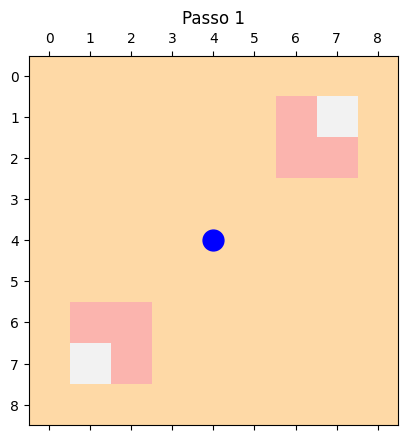
- **Ações**: O agente pode tomar uma dentre quatro possíveis ações em cada estado:
  - 0: Mover para cima (\(-1, 0\))
  - 1: Mover para baixo (\(+1, 0\))
  - 2: Mover para a esquerda (\(0, -1\))
  - 3: Mover para a direita (\(0, +1\))

- **Recompensas**: O agente recebe recompensas ou penalidades baseadas em suas ações:
  - Uma recompensa positiva ao alcançar um ponto de entrega.
  - Uma penalidade (recompensa negativa) ao tentar mover para uma célula contendo um obstáculo ou ao tentar sair dos limites da grade.
  - Uma penalidade por viver (\(-0.1\)) é aplicada a cada ação para incentivar o agente a alcançar o objetivo de maneira eficiente.

- **Função de Transição**: A função de transição é determinística para a maioria das ações. O agente se move na direção especificada pela ação, a menos que isso o leve para fora da grade ou para um obstáculo, caso em que o agente permanece no mesmo estado.

- **Fator de Desconto** (\(\gamma\)): O valor do fator de desconto é 0.95, indicando que recompensas futuras são consideradas quase tão importantes quanto recompensas imediatas, mas com uma ligeira depreciação com o tempo.

- **Política de Exploração** (\(\epsilon\)): O valor de \(\epsilon\) é 0.1, significando que há uma probabilidade de 10% de o agente escolher uma ação aleatória, facilitando a exploração do ambiente.

______________________________________________________________________

### Import das bibliotecas utilizadas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definição da classe DeliveryEnvironment

#### Parametros
* width: Inteiro representando a largura da grade do ambiente.
* height: Inteiro representando a altura da grade do ambiente.
* obstacles: Lista de tuplas, onde cada tupla contém as coordenadas (x, y) de um obstáculo na grade.
* deliveries: Lista de tuplas, onde cada tupla contém as coordenadas (x, y) de um ponto de entrega na grade.

#### Métodos
* initialize_grid - Cria e retorna uma matriz representando a grade do ambiente, marcando obstáculos e pontos de entrega.
* move_agent - Move o agente na grade com base na ação escolhida, se possível.
* is_delivery_completed - Verifica se o agente alcançou um ponto de entrega.
* reset - Reinicia o ambiente e a posição do agente para o estado inicial.

In [2]:
import numpy as np

class DeliveryEnvironment:
    def __init__(self, width, height, obstacles, deliveries):
        """
        Inicializa o ambiente de entrega, definindo suas dimensões, obstáculos e pontos de entrega.
        
        :param width: Inteiro representando a largura da grade do ambiente.
        :param height: Inteiro representando a altura da grade do ambiente.
        :param obstacles: Lista de tuplas, onde cada tupla contém as coordenadas (x, y) de um obstáculo na grade.
        :param deliveries: Lista de tuplas, onde cada tupla contém as coordenadas (x, y) de um ponto de entrega na grade.
        """
        self.width = width
        self.height = height
        self.obstacles = obstacles
        self.deliveries = deliveries
        self.grid = self.initialize_grid()  # Cria a representação da grade com base nos obstáculos e entregas
        self.agent_position = (4, 4)  # Posição inicial do agente no canto superior esquerdo da grade.

    def initialize_grid(self):
        """
        Cria e retorna uma matriz representando a grade do ambiente, marcando obstáculos e pontos de entrega.
        
        :return: Uma matriz 2D onde cada célula pode ser 0 (espaço livre), -1 (obstáculo) ou 1 (ponto de entrega).
        """
        # Inicializa uma grade 2D com zeros (espaços livres).
        grid = [[0 for _ in range(self.width)] for _ in range(self.height)]
        # Marca os obstáculos na grade com -1.
        for obstacle in self.obstacles:
            grid[obstacle[1]][obstacle[0]] = -1
        # Marca os pontos de entrega na grade com 1.
        for delivery in self.deliveries:
            grid[delivery[1]][delivery[0]] = 1
        return grid

    def move_agent(self, action):
        """
        Move o agente na grade com base na ação escolhida, se possível.
        
        :param action: Inteiro representando a ação a ser tomada pelo agente (0: cima, 1: baixo, 2: esquerda, 3: direita).
        :return: A recompensa associada ao novo estado do agente após a movimentação ou uma penalidade se o movimento for inválido.
        """
        # Mapeia a ação escolhida para um deslocamento na grade.
        moves = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}
        move = moves[action]
        # Calcula a nova posição do agente com base na ação.
        new_position = (self.agent_position[0] + move[0], self.agent_position[1] + move[1])

        # Verifica se a nova posição é válida (dentro dos limites da grade e não é um obstáculo).
        if 0 <= new_position[0] < self.height and 0 <= new_position[1] < self.width and self.grid[new_position[0]][new_position[1]] != -1:
            self.agent_position = new_position  # Atualiza a posição do agente.
            return self.grid[new_position[0]][new_position[1]]  # Retorna a recompensa baseada no estado alcançado.
        else:
            return -1  # Retorna uma penalidade se a ação levar a uma posição inválida.

    def is_delivery_completed(self):
        """
        Verifica se o agente alcançou um ponto de entrega.
        
        :return: Booleano indicando se o agente está em um ponto de entrega.
        """
        # Retorna True se a posição atual do agente é um ponto de entrega, caso contrário False.
        return self.grid[self.agent_position[0]][self.agent_position[1]] == 1
    
    def reset(self):
        """
        Reinicia o ambiente e a posição do agente para o estado inicial.
        """
        # Define a posição do agente de volta ao ponto de partida.
        self.agent_position = (4, 4)


### Definição da classe QLearningAgent

#### Parametros
* environment: O ambiente no qual o agente opera.
* learning_rate: Taxa de aprendizado (alfa), que determina o quanto da nova informação substitui a antiga.
* discount_factor: Fator de desconto (gamma), que pondera a importância das recompensas futuras.
* epsilon: Parâmetro para a política epsilon-greedy, equilibrando exploração e explotação.

#### Métodos
* choose_action - Escolhe uma ação usando a política epsilon-greedy.
* update_q_table - Atualiza a Q-Table usando a equação de Bellman.
* train - Treina o agente no ambiente especificado, utilizando o algoritmo Q-Learning.

In [3]:
class QLearningAgent:
    def __init__(self, environment, learning_rate=0.1, discount_factor=0.95, epsilon=0.1):
        """
        Inicializa o agente de Q-learning.
        
        :param environment: O ambiente no qual o agente opera.
        :param learning_rate: Taxa de aprendizado (alfa), que determina o quanto da nova informação substitui a antiga.
        :param discount_factor: Fator de desconto (gamma), que pondera a importância das recompensas futuras.
        :param epsilon: Parâmetro para a política epsilon-greedy, equilibrando exploração e explotação.
        """
        self.environment = environment
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.q_table = np.zeros((environment.height, environment.width, 4))
        self.path = []  # Inicializa a lista para armazenar o caminho percorrido pelo agente

    def choose_action(self):
        """
        Escolhe uma ação usando a política epsilon-greedy.
        
        Com uma probabilidade epsilon, escolhe uma ação aleatória (exploração).
        Com a probabilidade restante, escolhe a melhor ação conhecida (explotação).
        """
        if np.random.rand() < self.epsilon:
            # Exploração: escolhe uma ação aleatoriamente.
            return np.random.randint(4)
        else:
            # Explotação: escolhe a melhor ação conhecida baseada na Q-Table.
            state = self.environment.agent_position
            return np.argmax(self.q_table[state[0], state[1]])

    def update_q_table(self, reward, action, current_state, next_state):
        """
        Atualiza a Q-Table usando a equação de Bellman.
        
        :param reward: A recompensa recebida após tomar a ação.
        :param action: A ação que foi tomada.
        :param current_state: O estado do agente antes da ação ser tomada.
        :param next_state: O estado do agente após a ação ser tomada.
        """
        # Calcula o melhor valor Q futuro para o próximo estado
        future_rewards = np.max(self.q_table[next_state[0], next_state[1]])
        
        # Atualiza o valor Q para o estado atual e ação tomada
        self.q_table[current_state[0], current_state[1], action] += self.learning_rate * (
            reward + self.discount_factor * future_rewards - self.q_table[current_state[0], current_state[1], action]
        )

    def train(self, episodes=1000):
        """
        Treina o agente no ambiente especificado, utilizando o algoritmo Q-Learning.
        
        Durante o treinamento, o agente toma decisões com base na política epsilon-greedy,
        onde escolhe ações aleatórias com uma probabilidade 'epsilon' para explorar o ambiente,
        e a melhor ação conhecida com base na Q-Table com a probabilidade restante para explotar
        o conhecimento adquirido.
        
        Após cada ação tomada, a Q-Table é atualizada usando a equação de Bellman, considerando a
        recompensa recebida e as recompensas futuras esperadas. Uma penalidade por viver é aplicada
        a cada passo para incentivar o agente a encontrar o objetivo de maneira eficiente, exceto
        quando o objetivo é alcançado.
        
        O treinamento é realizado por um número definido de episódios, onde cada episódio representa
        uma sequência completa de ações do estado inicial até alcançar o objetivo ou até que uma
        condição de término seja satisfeita.
        
        :param episodes: Número de episódios de treinamento. Cada episódio começa com o agente na
                         posição inicial e termina quando o objetivo é alcançado ou após um número
                         máximo de ações.
        """
        for episode in range(episodes):
            # Reinicia o ambiente ao estado inicial
            self.environment.reset()
            done = False

            while not done:
                # Posição atual antes da ação
                current_position = self.environment.agent_position
                # Escolhe a ação
                action = self.choose_action()
                # Executa a ação
                reward = self.environment.move_agent(action)
                # Posição após a ação
                next_position = self.environment.agent_position

                # Verifica se a entrega foi completada antes de aplicar a penalidade por viver
                if not self.environment.is_delivery_completed():
                    # Penalidade por viver aplicada somente se a entrega não for completada
                    reward -= 0.1  

                # Atualiza a Q-Table, passando os estados atual e futuro corretamente
                self.update_q_table(reward, action, current_position, next_position)

                print(f"Época {episode + 1}:")
                print(f"Estado anterior: {current_position}")
                print(f"Ação tomada pelo agente: {action}")
                print(f"Estado atual: {next_position}")
                print(f"Recompensa: {reward}\n")

                # Verifica se a entrega foi completada para encerrar o loop
                done = self.environment.is_delivery_completed()

                # Atualiza o caminho
                self.path.append(current_position)  # Adiciona a posição atual ao caminho

### Instânciando as classes environment e o agente

Os seguintes parametros foram utilizados:

* learning_rate=0.1
* epsilon=0.1
* discount_factor=0.9

In [4]:
# Criação do ambiente 2D simulado
environment = DeliveryEnvironment(9, 9, [(1, 6), (2, 6), (2, 7), (6, 1), (6, 2), (7, 2)], [(7, 1), (1, 7)])
# Criação do Agente
agent = QLearningAgent(environment, learning_rate=0.1, epsilon=0.1, discount_factor=0.9)

### Trainamento do agente

In [5]:
# Traino do agente com 1000 episodios
agent.train(episodes=1000)

Época 1:
Estado anterior: (4, 4)
Ação tomada pelo agente: 0
Estado atual: (3, 4)
Recompensa: -0.1

Época 1:
Estado anterior: (3, 4)
Ação tomada pelo agente: 0
Estado atual: (2, 4)
Recompensa: -0.1

Época 1:
Estado anterior: (2, 4)
Ação tomada pelo agente: 0
Estado atual: (1, 4)
Recompensa: -0.1

Época 1:
Estado anterior: (1, 4)
Ação tomada pelo agente: 0
Estado atual: (0, 4)
Recompensa: -0.1

Época 1:
Estado anterior: (0, 4)
Ação tomada pelo agente: 0
Estado atual: (0, 4)
Recompensa: -1.1

Época 1:
Estado anterior: (0, 4)
Ação tomada pelo agente: 1
Estado atual: (1, 4)
Recompensa: -0.1

Época 1:
Estado anterior: (1, 4)
Ação tomada pelo agente: 1
Estado atual: (2, 4)
Recompensa: -0.1

Época 1:
Estado anterior: (2, 4)
Ação tomada pelo agente: 1
Estado atual: (3, 4)
Recompensa: -0.1

Época 1:
Estado anterior: (3, 4)
Ação tomada pelo agente: 1
Estado atual: (4, 4)
Recompensa: -0.1

Época 1:
Estado anterior: (4, 4)
Ação tomada pelo agente: 1
Estado atual: (5, 4)
Recompensa: -0.1

Época 1:
E

## Animação da evolução do aprendizado do agente

<span style="color: red; font-weight: bold; font-size: larger;">Informe qual frame deseja começar quando executar a celula</span>



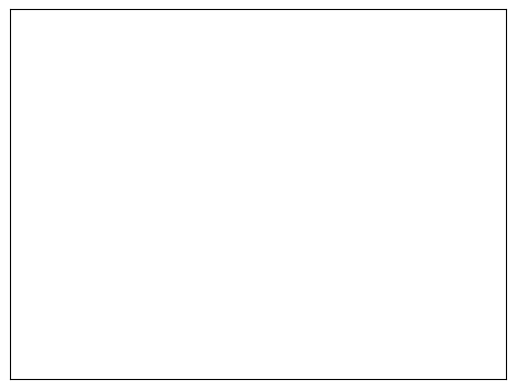

In [6]:
# Importações necessárias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time
from IPython.display import display, clear_output

# Preparando a representação gráfica do labirinto
fig, ax = plt.subplots()

# Configurações de plotagem
ax.set_xticks([])
ax.set_yticks([])

# Função para plotar o estado do ambiente em um determinado frame
def plot_frame(frame):
    fig, ax = plt.subplots()
    ax.matshow(environment.grid, cmap=plt.cm.Pastel1)
    if frame < len(agent.path):
        state = agent.path[frame]
        ax.plot(state[1], state[0], 'bo', markersize=15)  # Desenha o agente
        ax.set_title(f"Passo {frame + 1}")
    # plt.xticks([]), plt.yticks([])  # Remove os ticks do eixo
    return fig


start_frame = input("A animação possui um total de [%s] frames. A partir de qual frame você gostaria de ver?" % (len(agent.path)))

try:
    # Exibir as imagens em sequência para simular a animação
    for frame in range(int(start_frame), len(agent.path)):
        fig = plot_frame(frame)
        display(fig)  # Mostra a figura
        clear_output(wait=True)  # Limpa a saída para a próxima imagem
        plt.close(fig)  # Fecha a figura para liberar memória
        time.sleep(0.1)  # Velocidade da "animação"
except KeyboardInterrupt:
    # Lidar com a interrupção do teclado
    print("Animação interrompida pelo usuário.")
    # Garante que todas as figuras sejam fechadas ao interromper
    plt.close()  


### Apresentação do q_table

In [7]:
agent.q_table

array([[[-2.16705542e-01, -1.56874982e-01, -2.18338133e-01,
         -1.49224754e-01],
        [-4.09433926e-01, -1.55804530e-01, -1.49512741e-01,
         -1.48155895e-01],
        [-3.89275711e-01, -1.41861788e-01, -1.44137674e-01,
         -1.43628580e-01],
        [-3.17812920e-01, -1.27423618e-01, -1.24334808e-01,
         -5.97604197e-02],
        [-1.10000000e-01, -9.89945925e-02, -1.02724625e-01,
          4.27810396e-01],
        [-5.24591081e-01,  2.84627530e-01,  2.04272001e-01,
          6.20000000e-01],
        [-3.65921658e-01, -3.69532855e-01,  3.73530224e-01,
          8.00000000e-01],
        [-1.93918839e-01,  1.00000000e+00,  5.87498274e-01,
          3.20741975e-01],
        [-1.10000000e-01,  6.87132023e-01, -1.00000000e-03,
          0.00000000e+00]],

       [[-1.55298796e-01, -1.55135576e-01, -2.18900000e-01,
         -1.59155149e-01],
        [-1.59233360e-01, -1.56260632e-01, -1.56291903e-01,
         -1.60086895e-01],
        [-1.54196569e-01, -1.63102915e-01

### Gerando o video final
<span style="color: red; font-weight: bold; font-size: larger;">Atenção, esta celula é apenas para geração do video final, não precisa ser executada!</span>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
import matplotlib.patches as patches

# Supondo que environment e agent sejam suas instâncias de ambiente e agente
# e que agent.path contém o caminho que você quer visualizar na animação

# Preparando a representação gráfica do ambiente
fig, ax = plt.subplots()

# Configurações iniciais do plot
ax.set_xticks(np.arange(-0.5, environment.width, 1), minor=True)
ax.set_yticks(np.arange(-0.5, environment.height, 1), minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
ax.set_xticks([])
ax.set_yticks([])

# Plot inicial do ambiente
def init():
    ax.imshow(environment.grid, cmap=plt.cm.Pastel1, vmin=-1, vmax=2)
    return fig,

# Função de atualização para a animação
def update(frame):
    ax.clear()
    # Reconfigurações necessárias a cada frame
    ax.set_xticks(np.arange(-0.5, environment.width, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, environment.height, 1), minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.imshow(environment.grid, cmap=plt.cm.Pastel1, vmin=-1, vmax=2)
    if frame < len(agent.path):
        state = agent.path[frame]
        ax.plot(state[1], state[0], 'bo', markersize=15)  # Desenha o agente
    return fig,

# Criação da animação
ani = FuncAnimation(fig, update, frames=len(agent.path), init_func=init, blit=True)

# Salvar a animação como um arquivo de vídeo
ani.save('agent_animation.mp4', writer=animation.FFMpegWriter(fps=15))

plt.close()


<video controls src="agent_animation.mp4" title="Title"></video>